KeyGen time AVG: 0.00019 sec
AuthCom time AVG: 0.00098 sec
VfCom time AVG: 0.00027 sec
VfAuth time AVG: 0.00881 sec
RdmAC time AVG: 0.00087 sec
VfProof time AVG: 0.00036 sec
UpdAC time AVG: 0.00070 sec
VfUpd time AVG: 0.00881 sec


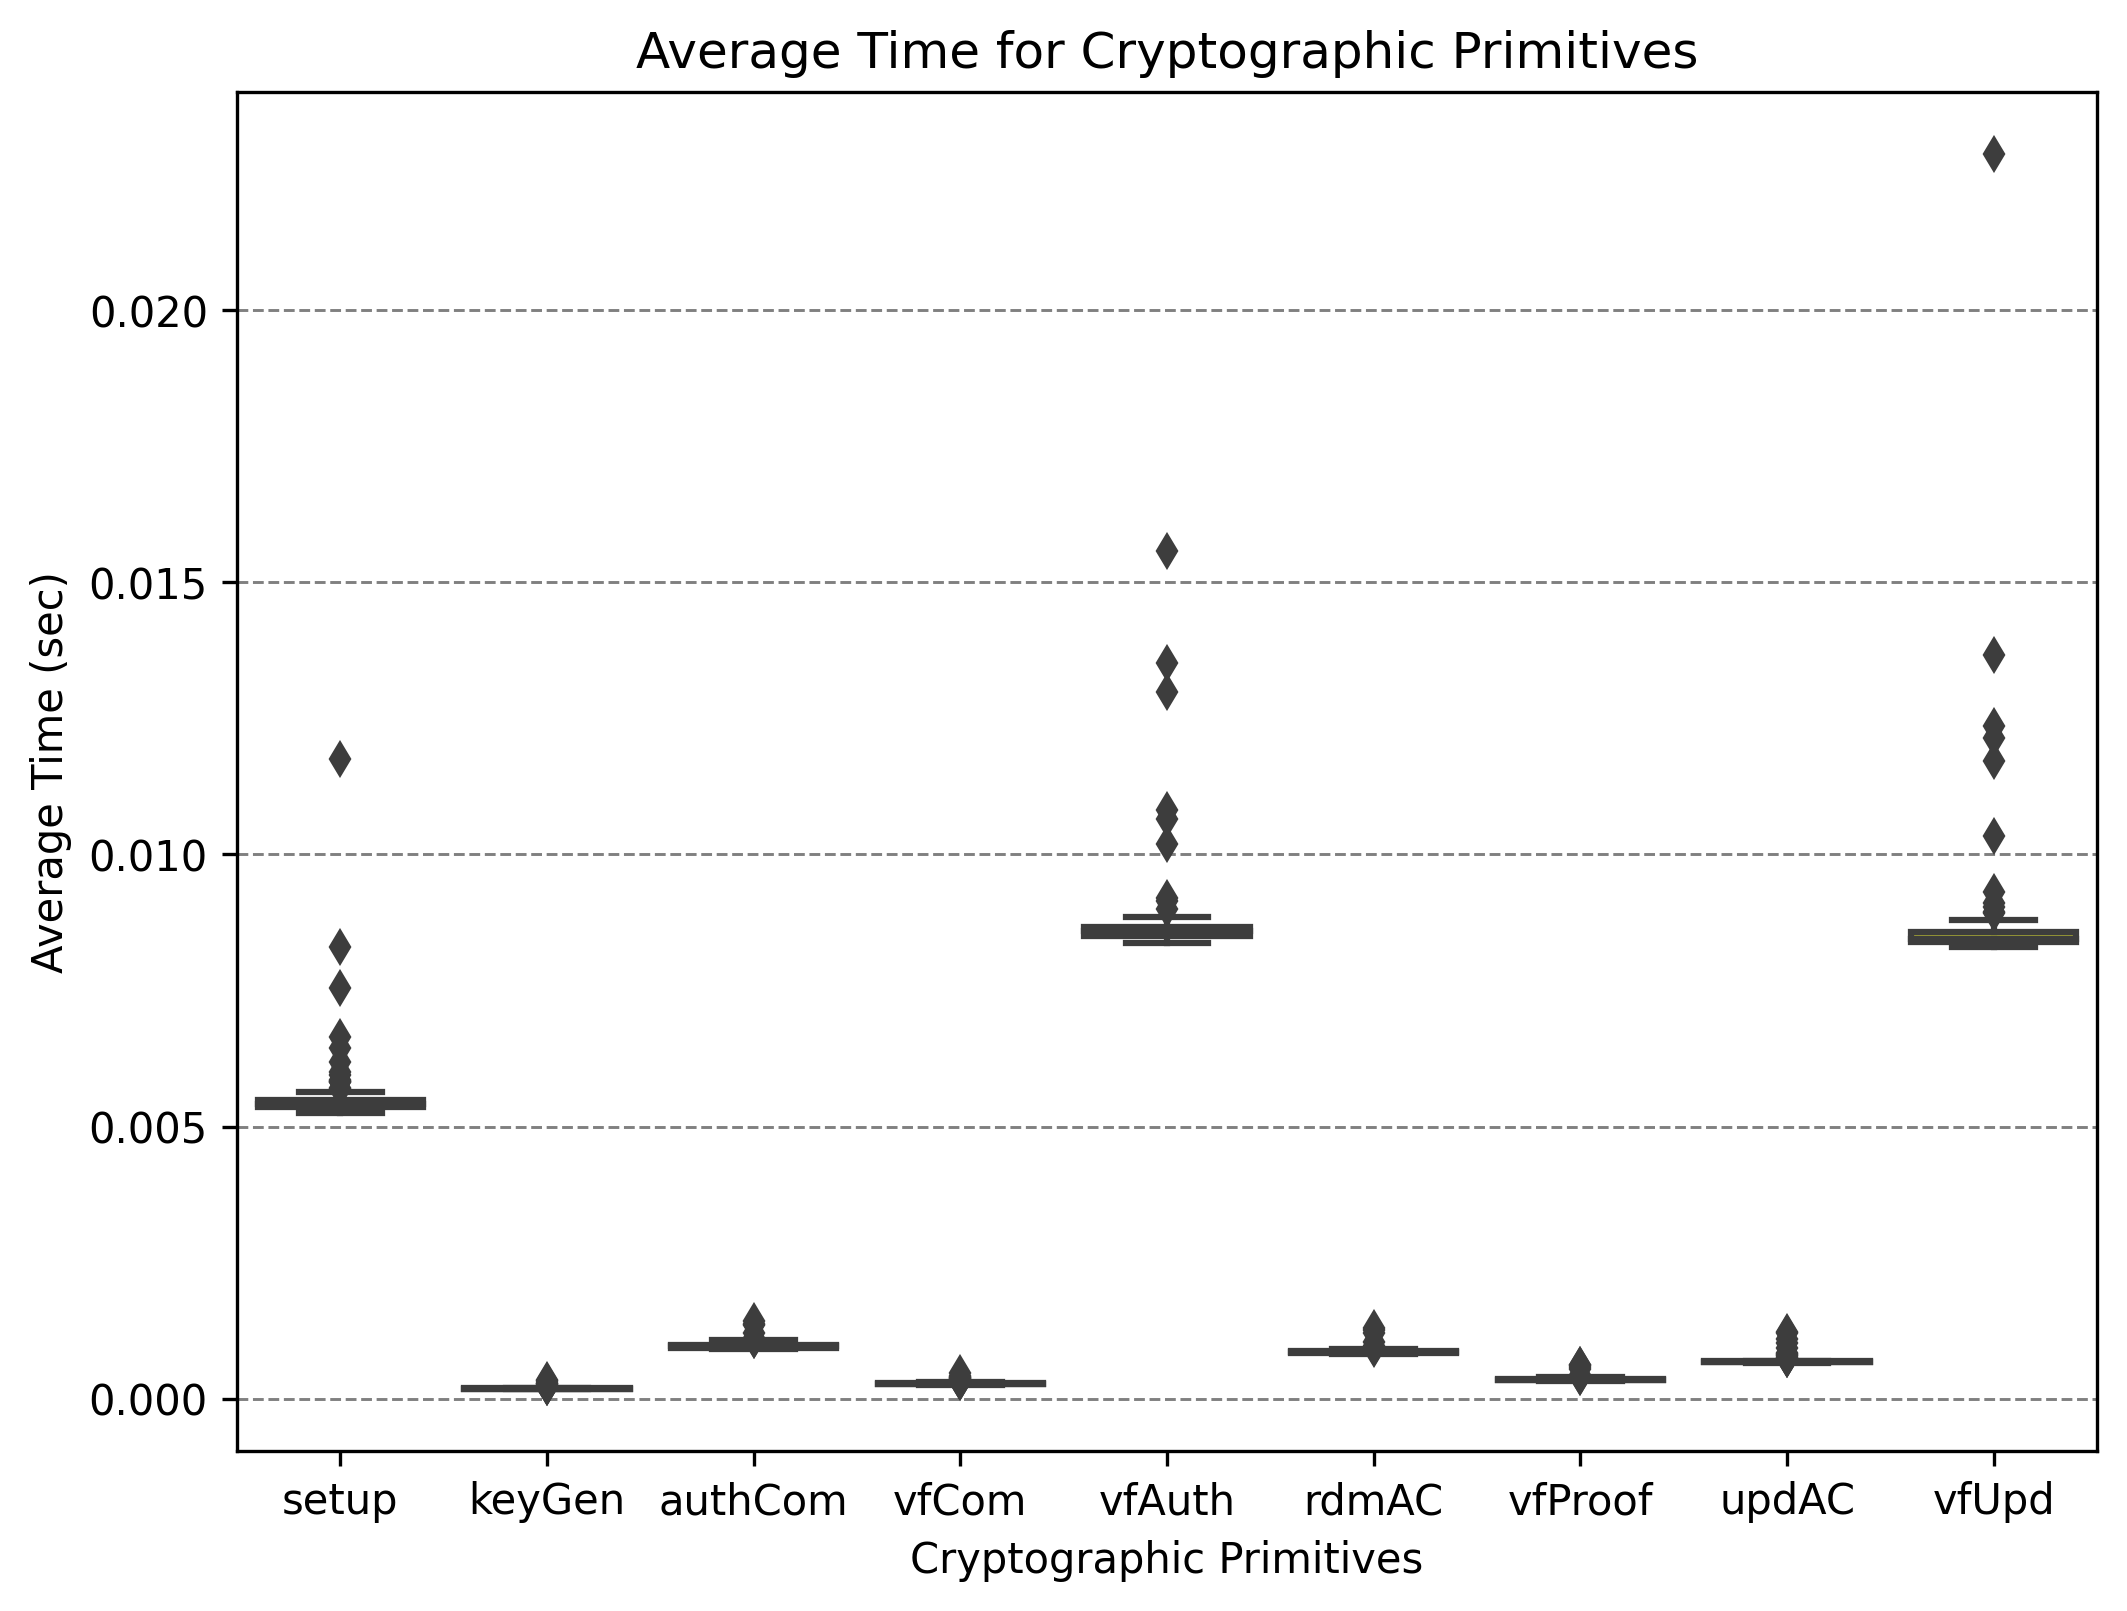

In [2]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

runTimes = 100

# 初始化数组
setup = np.zeros(runTimes)
keyGen = np.zeros(runTimes)
authCom = np.zeros(runTimes)
vfCom = np.zeros(runTimes)
vfAuth = np.zeros(runTimes)
rdmAC = np.zeros(runTimes)
vfProof = np.zeros(runTimes)
updAC = np.zeros(runTimes)
vfUpd = np.zeros(runTimes)

# 循环获取数据
for i in range(runTimes):
    res = subprocess.check_output('./LinkRSUC', shell=True)
    res = res.decode('utf-8')
    res_split = res.splitlines()

    setup_time = eval(res_split[0][-11:-4])
    keyGen_time = eval(res_split[2][-11:-4])
    authCom_time = eval(res_split[4][-11:-4])
    vfCom_time = eval(res_split[6][-11:-4])
    vfAuth_time = eval(res_split[8][-11:-4])
    rdmAC_time = eval(res_split[10][-11:-4])
    vfProof_time = eval(res_split[12][-11:-4])
    updAC_time = eval(res_split[14][-11:-4])
    vfUpd_time = eval(res_split[16][-11:-4])

    setup[i] = setup_time
    keyGen[i] = keyGen_time
    authCom[i] = authCom_time
    vfCom[i] = vfCom_time
    vfAuth[i] = vfAuth_time
    rdmAC[i] = rdmAC_time
    vfProof[i] = vfProof_time
    updAC[i] = updAC_time
    vfUpd[i] = vfUpd_time

# 打印平均值
print("KeyGen time AVG: {:.5f} sec".format(np.mean(keyGen)))
print("AuthCom time AVG: {:.5f} sec".format(np.mean(authCom)))
print("VfCom time AVG: {:.5f} sec".format(np.mean(vfCom)))
print("VfAuth time AVG: {:.5f} sec".format(np.mean(vfAuth)))
print("RdmAC time AVG: {:.5f} sec".format(np.mean(rdmAC)))
print("VfProof time AVG: {:.5f} sec".format(np.mean(vfProof)))
print("UpdAC time AVG: {:.5f} sec".format(np.mean(updAC)))
print("VfUpd time AVG: {:.5f} sec".format(np.mean(vfUpd)))

# 创建数据字典
data = {
    'setup': setup,
    'keyGen': keyGen,
    'authCom': authCom,
    'vfCom': vfCom,
    'vfAuth': vfAuth,
    'rdmAC': rdmAC,
    'vfProof': vfProof,
    'updAC': updAC,
    'vfUpd': vfUpd
}

# 将数据转换为 DataFrame
df = pd.DataFrame(data)

# 绘制箱线图
plt.figure(figsize=(8, 6), dpi=300)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, zorder=0)
sns.boxplot(data=df)

# 设置标题和标签
plt.title('Average Time for Cryptographic Primitives')
plt.xlabel('Cryptographic Primitives')
plt.ylabel('Average Time (sec)')

# 保存图形
plt.savefig('result.png')

# 显示图形
plt.show()